In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [38]:
def exesh(kicarr):
    f = open("exe.sh",'w')
    for kicint in kicarr:
        f.write("python gtls_kepler.py -k "+str(kicint)+" -fig; \n")
    f.close()

In [75]:
dat=pd.read_csv("output_all.txt",delimiter=",")
datste=pd.read_csv("output_steknown_detected.txt",delimiter=",",comment="#")

In [76]:
len(datste)

69

In [40]:
tSN=dat["maxsn"].values/np.sqrt(dat["diff"].values)
tSNste=datste["maxsn"].values/np.sqrt(datste["diff"].values)

In [41]:
mask0=(dat["lent"]>10000)&(dat["L"]/dat["W"]<0.5)
maskste0=(datste["lent"]>10000)&(datste["L"]/datste["W"]<0.5)

In [42]:
sncrit=2.7
deltacrit=6

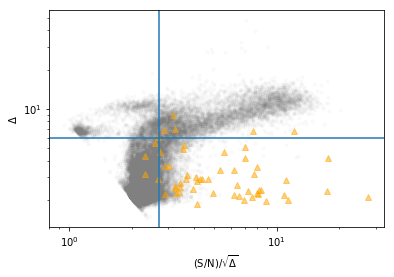

In [43]:
plt.plot(tSN[mask0],dat["diff"][mask0],".",color="gray",alpha=0.03)
plt.plot(tSNste[maskste0],datste["diff"][maskste0],"^",color="orange",alpha=0.5)
#plt.xlim(0,30)
#plt.ylim(0,50)
plt.xscale("log")
plt.yscale("log")
#xar=np.linspace(0,30,100)
#plt.plot(xar,xar)
plt.ylabel("$\Delta$")
plt.xlabel("(S/N)/$\sqrt{\Delta}$")
plt.axvline(sncrit)
plt.axhline(deltacrit)
plt.show()

In [64]:
sncrit=2.5
deltacrit=7.1
Wcrit=0.5

#mask=(tSN>sncrit)&(dat["diff"]<deltacrit)&(dat["lent"]>10000)&(dat["L"]/dat["W"]<Wcrit)
#maskste=(tSNste>sncrit)&(datste["diff"]<deltacrit)&(datste["lent"]>10000)&(datste["L"]/datste["W"]<Wcrit)

ratu = 0.2
sncrit2=7.0
ratd=0.03
mask=(tSN>sncrit)&(dat["diff"]<deltacrit)&(dat["lent"]>10000)&(((dat["L"]/dat["W"]<ratu)&(dat["L"]/dat["W"]>ratd))|(tSN>sncrit2))
maskste=(tSNste>sncrit)&(datste["diff"]<deltacrit)&(datste["lent"]>10000)&(((datste["L"]/datste["W"]<ratu)&(datste["L"]/datste["W"]>ratd))|(tSNste>sncrit2))

In [65]:
len(tSNste[maskste])/len(tSNste),len(tSN[mask])/len(tSN)*200000

(0.5507246376811594, 3674.9259699830427)

In [66]:
len(tSNste[maskste])

38

In [67]:
len(tSN)

39511

In [68]:
np.median(dat["L"][mask]/dat["W"][mask])

0.13056345383858731

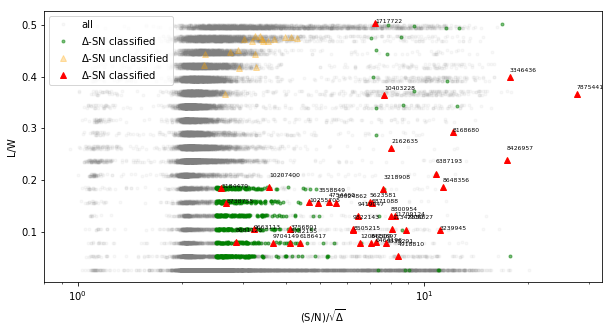

In [94]:
fig=plt.figure(figsize=(10,5))
plt.plot(tSN[mask0],dat["L"][mask0]/dat["W"][mask0],".",color="gray",alpha=0.05,label="all")
plt.plot(tSN[mask],dat["L"][mask]/dat["W"][mask],".",color="green",alpha=0.5,label="$\Delta$-SN classified")
rat=np.array(datste["L"][maskste0]/datste["W"][maskste0])
plt.plot(tSNste[maskste0],rat,"^",color="orange",alpha=0.3,label="$\Delta$-SN unclassified")

rat=np.array(datste["L"][maskste]/datste["W"][maskste])
plt.plot(tSNste[maskste],rat,"^",color="red",alpha=1.0,label="$\Delta$-SN classified")
plt.legend(loc="upper left")

for i,name in enumerate(datste["KIC"][maskste]):
    plt.text(tSNste[maskste][i],rat[i]+np.mod(i,3)*0.01,str(name),fontsize=6)
plt.xscale("log")
plt.xlabel("(S/N)/$\sqrt{\Delta}$")
plt.ylabel("L/W")
#plt.savefig("temp.pdf")
plt.savefig("crit2.png")
#plt.yscale("log")
#plt.xlim(0,30)
plt.show()

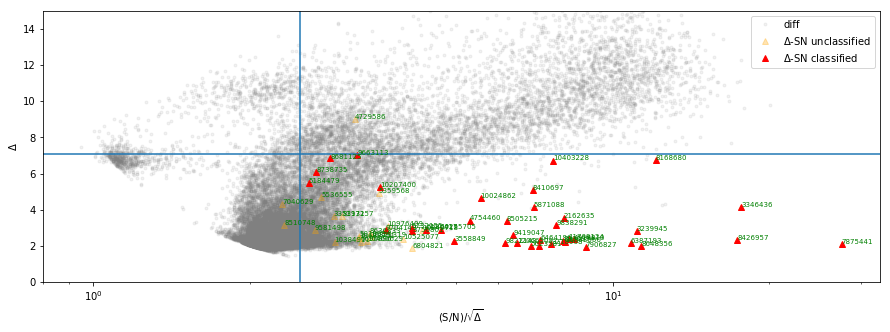

In [96]:
fig=plt.figure(figsize=(15,5))
plt.plot(tSN[mask0],dat["diff"][mask0],".",color="gray",alpha=0.1)
plt.plot(tSNste[maskste0],datste["diff"][maskste0],"^",color="orange",alpha=0.3,label="$\Delta$-SN unclassified")
plt.plot(tSNste[maskste],datste["diff"][maskste],"^",color="red",alpha=1.0,label="$\Delta$-SN classified")
tmp=np.array(datste["diff"][maskste0])
plt.legend()
for i,name in enumerate(datste["KIC"][maskste0]):
    plt.text(tSNste[maskste0][i],tmp[i]+np.mod(i,3)*0.01,str(name),fontsize=7,color="green")
#plt.xlim(0,30)
plt.ylim(0,15)
plt.xscale("log")
#plt.yscale("log")
#xar=np.linspace(0,30,100)
#plt.plot(xar,xar)
plt.ylabel("$\Delta$")
plt.xlabel("(S/N)/$\sqrt{\Delta}$")
plt.axvline(sncrit)
plt.axhline(deltacrit)
plt.savefig("crit1.png")
plt.show()

In [71]:
datste[maskste].to_csv("rest_steinfo.txt")

In [72]:
datstem=datste[maskste]
datm=dat[mask]

In [73]:
datm[~datm["KIC"].isin(datste["KIC"])].to_csv("false_steinfo.txt")


In [74]:
len(datm[~datm["KIC"].isin(datste["KIC"])])

717